In [27]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
import warnings

In [2]:
# reading the file 
df = pd.read_csv('TSLA.CSV')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [13]:
# Performing univariate analysis 
stock_data = df[["Date","Close" ]]

In [14]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [16]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [18]:
# changing the data type of Date to datatime
stock_data.loc[:, "Date"] = pd.to_datetime(stock_data["Date"])


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [19]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


## Why do we convert this column into index?
1. on the basis of data, data retrival will be easy 
2. visualization will be easy
3. whatever library we are using for the time series like statsmodel, scipy this library wants data which is having date column as a index


In [21]:
# Setting Date column as index 
stock_data = stock_data.set_index("Date")

In [22]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [23]:
# 2. EDA of the data 
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


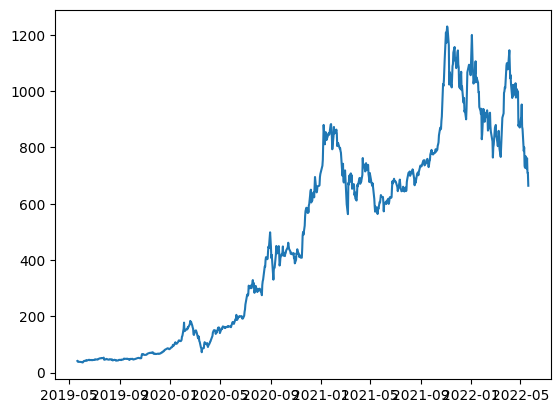

In [24]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

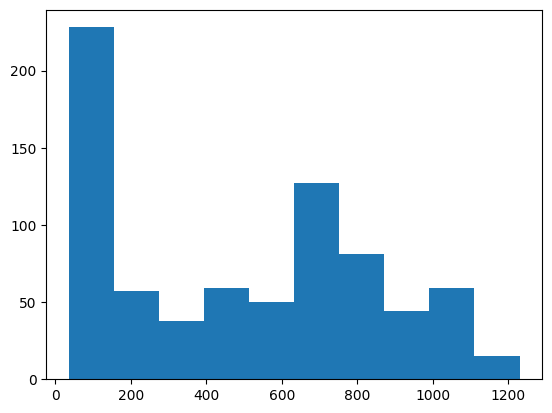

In [25]:
plt.hist(stock_data.Close)

C:\Users\PC\AppData\Local\Temp\ipykernel_26956\770869412.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<AxesSubplot: xlabel='Close', ylabel='Density'>

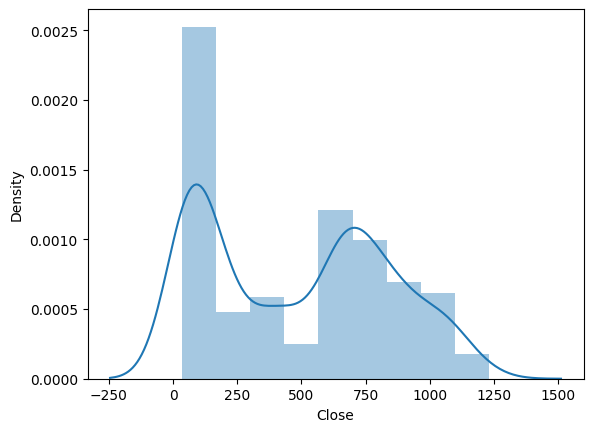

In [28]:
# Distiribution of the data 
import seaborn as sns
sns.distplot(stock_data.Close)

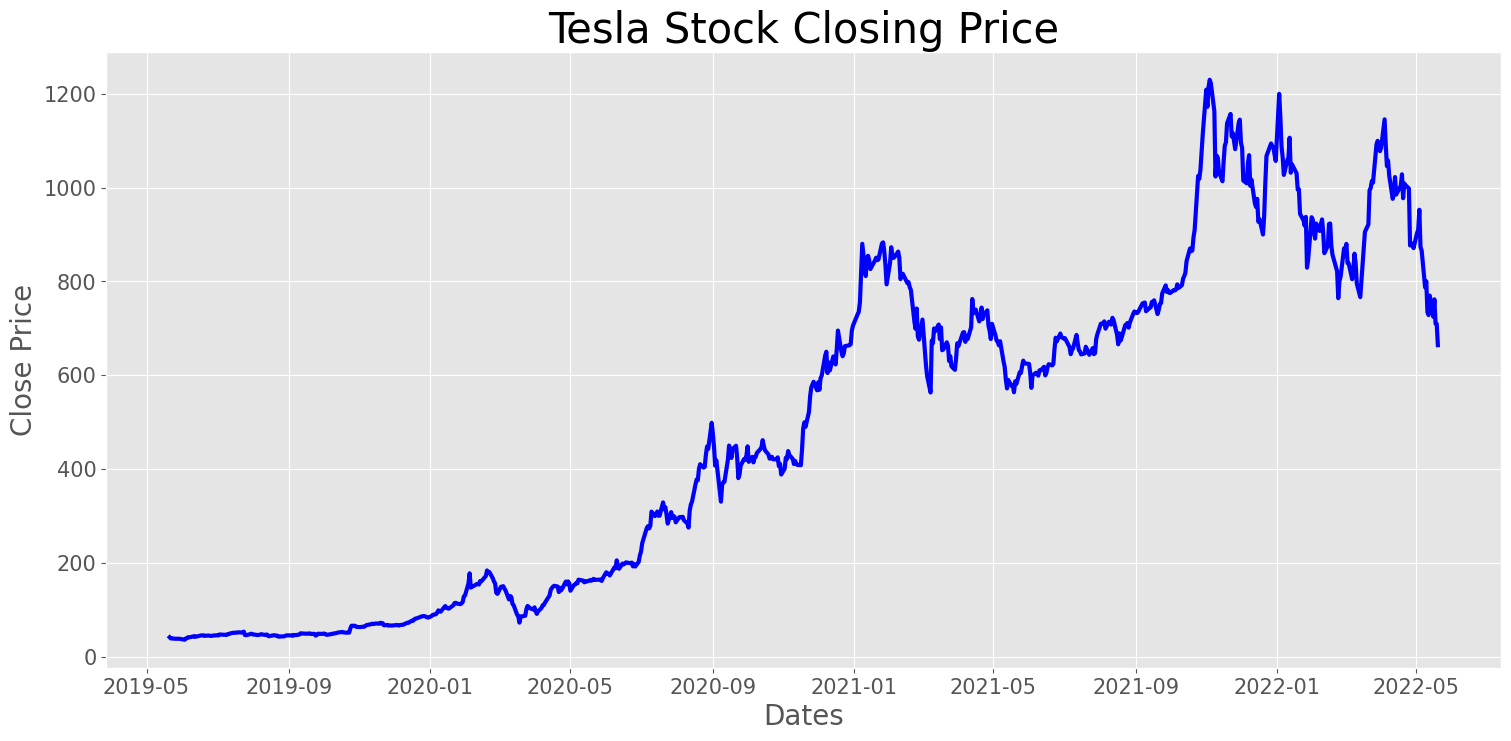

In [31]:
# Making interactive plot 
plt.style.use('ggplot')
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Price', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

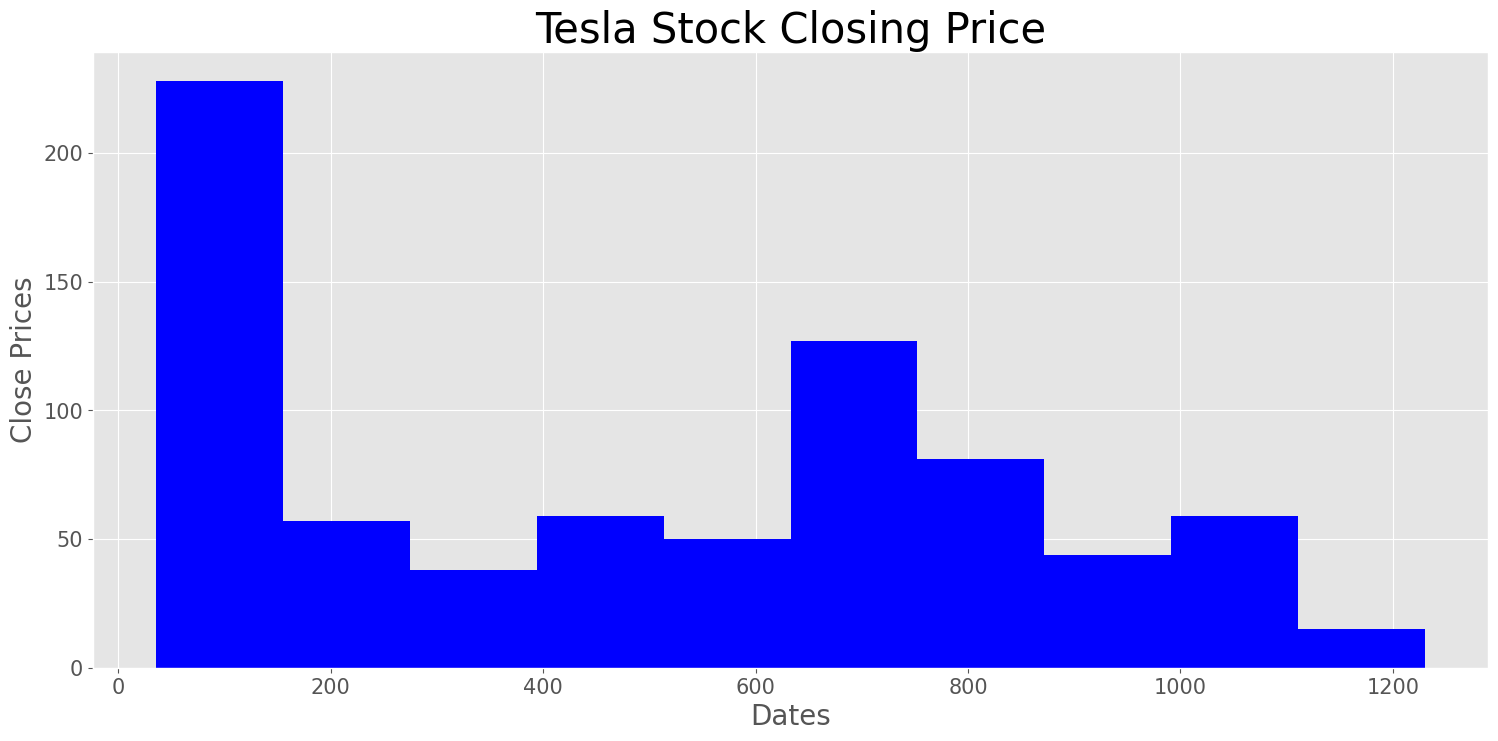

In [32]:
# plotting close price with histogram
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()